# Falling Parachutist Problem
***


### Analytical Solution
****
$$ v(t) = \frac{gm}{c}(1-e^{\frac{-c}{m}t}) $$

<center>Eq. 1.10</center>


**Problem Statement**. A parachutist of mass $68.1 kg$ jumps out of a stationary hot air balloon. Use $Eq. (1.10)$ to compute velocity prior to opening the chute. The drag coefficient is equal to $12.5 kg/s$.

**Solution**. Inserting the parameters into $Eq. (1.10)$ yields

$$ v(t)=\frac{9.81(68.1)}{12.5}(1-e^{(-\frac{12.5}{68.1})t}) = 53.44(1-e^{-0.18355t}) $$

In [2]:
import math

GRAVITY = 9.81
mass = 68.1
drag_coefficient = 12.5

def velocity(t):
    x = (-drag_coefficient/mass)*t
    return ((GRAVITY*mass)/drag_coefficient)*(1-math.pow(math.e, x))

velocity(2)

16.42172057920007

In [3]:
import pandas as pd
df = pd.DataFrame(map(velocity, range(25)),columns=['v(t)'])
df.head()

,v(t)
0,0.000000
1,8.962318
2,16.421721
3,22.630235
4,27.797627


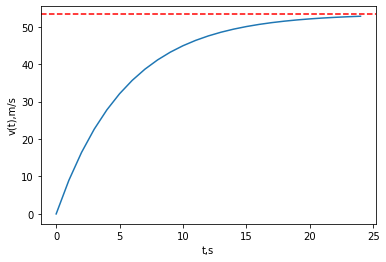

In [4]:
import matplotlib.pyplot as plt
plt.plot(df, label="value")
plt.xlabel('t,s')
plt.ylabel('v(t),m/s')
# plt.axhline(y=df['v(t)'].iat[-1], color='r', linestyle='-') # terminal value
plt.axhline(y=velocity(1000), color='r', linestyle='--', label="terminal velocity") # terminal velocity at 1000s 
plt.show()

According to the model, the parachutist accelerates rapidly. A velocity of $44.92 m/s$ is attained after $10s$. Note also that after a sufficiently long time, a constant velocity, called the *terminal velocity*, of $53.44 m/s$ is reached. This velocity is constant because, eventually, the force of gravity will be in balance with the air resistance. Thus, the net
force is zero and acceleration has ceased.

### Numerical Solution
****

$Equation (1.10)$ is called an *analytical, or exact, solution* because it exactly satisfies
the original differential equation. Unfortunately, there are many mathematical models
that cannot be solved exactly. In many of these cases, the only alternative is to develop
a numerical solution that approximates the exact solution.

*Numerical methods* are those in which the mathematical
problem is reformulated so it can be solved by arithmetic operations.

**Euler Method**. We could solve eq. 1.10 by using numerical approach called Euler's method,

$$v_{i+1}=v_{i}+\frac{dv_{i}}{dt}\Delta{t}$$

or $$ New value = old value + slope \times step size $$
*****

$$ v(t_{i+1}) = v(t_{i})+\left[g-\frac{c}{m}v(t_{i})\right](t_{i+1} - t_{i}) $$

<center>Eq. 1.12</center>

**Problem Statement**. Perform the same computation as in the first example but use $Eq. (1.12)$ to compute the velocity. Employ a step size of $2s$ for the calculation.

**Solution**. At the start of the computation $(t_{i}=0)$, the velocity of the parachutist is zero. Using this information and the parameter values from Example 1.1, Eq. (1.12) can be used to compute velocity at $t_{i+1}=2s$:

$$ v = 0+\left[9.81-\frac{12.5}{68.1}(0)\right](2) = 19.62 m/s $$

For the next interval (from $t=2$ to $4s$), the computation is repeated, with the result

$$ v = 19.62+\left[9.81-\frac{12.5}{68.1}(19.62)\right](2) = 32.04 m/s $$


In [5]:
vals = {} #actual values from step to given t*step
dp = {} #for dynamic programming memoization
def velocity_numerical(i, step):
    """
    if youre looking for the exact value at specific time t pls
    use the function velocity_at(t) that returns the vals[int(i/step)]
    note that the i in this function is the number of iterations
    and the step is the time interval
    """
    if i in dp:
        return dp[i]
    if i == 0:
        vals[0] = 0
        return 0
    else:
        vn = velocity_numerical(i-1, step)+(GRAVITY - drag_coefficient/mass*velocity_numerical(i-1, step))*step
        dp[i] = vn
        vals[step*i] = vn
        return vn

def velocity_at(t, step=2):
    velocity_numerical(t, step)
    return vals[t]

velocity_at(12, step=2) # returns the velocity at t=10s at 2 seconds interval

vals

{0: 0,
 2: 19.62,
 4: 32.037356828193836,
 6: 39.89621261813736,
 8: 44.87002590075947,
 10: 48.01791653924718,
 12: 50.01019387432531,
 14: 51.2710918646611,
 16: 52.069105130204015,
 18: 52.574161984020456,
 20: 52.89380883276478,
 22: 53.09611102337976,
 24: 53.22414662419483}

In [5]:
import pandas as pd
df_numerical = pd.DataFrame(list(vals.items()),columns=['t,s','v,m/s'])
df_numerical.head()

,"t,s","v,m/s"
0,0,0.000000
1,2,19.620000
2,4,32.037357
3,6,39.896213
4,8,44.870026


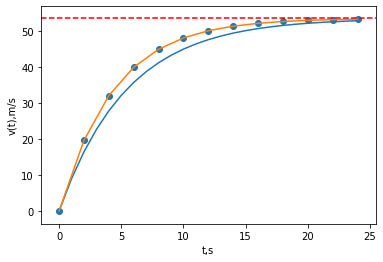

In [6]:
import matplotlib.pyplot as plt
plt.plot(df, label="value")
plt.xlabel('t,s')
plt.ylabel('v(t),m/s')
plt.plot(df_numerical['t,s'],df_numerical['v,m/s'])
plt.scatter(df_numerical['t,s'],df_numerical['v,m/s'])
plt.axhline(y=velocity(1000), color='r', linestyle='--', label="terminal velocity") # terminal velocity at 1000s 
plt.show()

The results are plotted along with the exact solution. It can be seen that
the numerical method captures the essential features of the exact solution. However, because we have employed straight-line segments to approximate a continuously curving
function, there is some discrepancy between the two results. One way to minimize such
discrepancies is to use a smaller step size. For example, applying $Eq. (1.12)$ at $ls$ intervals
results in a smaller error, as the straight-line segments track closer to the true solution.
Using hand calculations, the effort associated with using smaller and smaller step sizes
would make such numerical solutions impractical. However, with the aid of the computer,
large numbers of calculations can be performed easily. Thus, you can accurately model the
velocity of the falling parachutist without having to solve the differential equation exactly

### Reference:

Chapra, S. C., & Canale, R. P. (2015). *Numerical Methods for Engineers* (7th ed.). New York: McGraw-Hill Education.
